## Dataset and Problem Introduction

In this analysis, we explore research papers published at the NIPS conference (Neural Information Processing Systems) from 1987 until 2017.

<p>The notebook focuses on analyzing papers with natural language processing methods. Each paper discusses a novel technique or improvement, with the title, abstract and main text extracted.</p>

Data Source: https://www.kaggle.com/benhamner/nips-papers
<br>Reference: https://www.datacamp.com/

In [11]:
# Importing modules
import pandas as pd

# Read datasets/papers.csv into papers
papers = pd.read_csv("datasets/papers.csv")

# Print out the first rows of papers
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


## Preparing data
<p>For the analysis of the papers, we are only interested in the text data associated with the paper as well as the year the paper was published.</p>
<p>Since the file contains some metadata such as id and filename, we remove all the columns that do not contain useful text information.</p>

In [12]:
# Remove the columns
papers.drop(['id', 'event_type', 'pdf_name'], axis=1, inplace=True)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


## Evolution of machine learning
<p>In order to understand how the machine learning field has recently exploded in popularity, we begin by visualizing the number of publications per year. </p>
<p>By looking at the number of published papers per year,  we can understand the extent of the machine learning revolution. Typically, this significant increase in popularity is attributed to the large amounts of compute power, data and improvements in algorithms.</p>

<AxesSubplot:xlabel='year'>

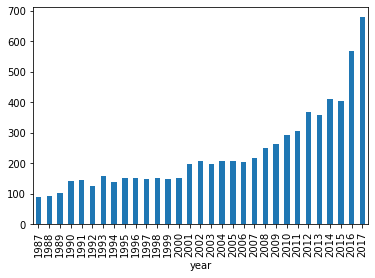

In [13]:
# Group the papers by year
groups = papers.groupby('year')

# Determine the size of each group
counts = groups.size()

# Visualise the counts as a bar plot
import matplotlib.pyplot
%matplotlib inline
counts.plot(kind='bar')

## Preprocessing the text data
<p>We now analyse the titles of the different papers to identify machine learning trends. First, we perform some simple preprocessing on the titles in order to make them more amenable for analysis. We use a regular expression to remove any punctuation in the title, and then perform lowercasing.</p>

In [14]:
# Load the regular expression library
import re

# Print the titles of the first rows 
print(papers['title'].head())

# The following line 
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())

# Print the processed titles of the first rows 
papers['title_processed'].head()

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object


0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
Name: title_processed, dtype: object

## Word cloud
<p>In order to verify whether the preprocessing happened correctly, we can make a word cloud of the research paper titles. This will give us a visual representation of the most common words and allows us to verify whether we need additional preprocessing before further analysing the text data.</p>
<p>We have used Andreas Mueller's <a href="http://amueller.github.io/word_cloud/">wordcloud library</a>.</p>

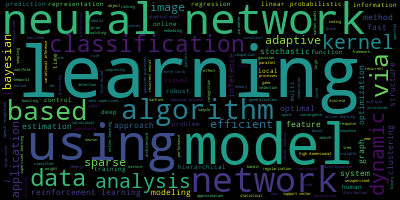

In [15]:
# Import the wordcloud library
import wordcloud

# Join the different processed titles together.
long_string = ' '.join(papers['title_processed'])

# Create a WordCloud object, generate a wordcloud and visualise it
wordcloud = wordcloud.WordCloud()

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Preparing text for LDA analysis
<p>The main text analysis method we use is latent Dirichlet allocation (LDA). LDA performs topic detection on large document sets, determining what the main topics are. A 'topic' is a collection of words that tend to co-occur often. The hypothesis is that LDA will be able to determine what the different topics are in the research titles. These topics can then be used as a starting point for further analysis.</p>
<p>LDA does not work directly on text data. It first needs to convert the documents into a simple vector representation. This representation is then used by LDA to determine the topics. Each entry of a 'document vector' will correspond with the number of times a word occurred. Therefore, we convert a list of titles into a list of vectors, all with length equal to the vocabulary. For example, <em>'Analyzing machine learning trends with neural networks.'</em> would be transformed into <code>[1, 0, 1, ..., 1, 0]</code>.</p>
<p>Following this we plot the 10 most common words based on the outcome. As a check, these words should also occur in the word cloud.</p>

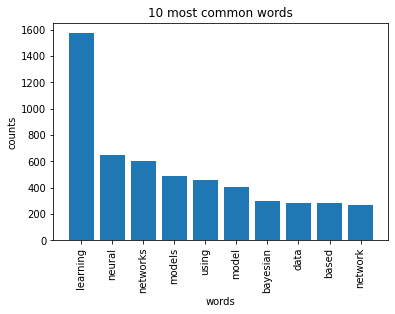

In [16]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stopwords
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## Analysing trends with LDA
<p>Finally, the research titles will also be analysed using LDA. Note that in order to process a new set of documents (e.g. news articles), a similar set of steps will be required to preprocess the data. The flow that was constructed here can thus easily be exported for a new text dataset.</p>
<p>The only parameter we will tweak is the number of topics in the LDA algorithm. Typically, one would calculate the 'perplexity' metric to determine which number of topics is best and iterate over different amounts of topics until the lowest 'perplexity' is found.</p>

In [17]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
networks neural neurons using spiking information maximum network optimization entropy

Topic #1:
analysis neural learning fast network convergence large robust optimization algorithms

Topic #2:
gaussian process model processes regression visual networks using time neural

Topic #3:
models recognition bayesian learning inference neural probabilistic model networks graphical

Topic #4:
networks neural using vector support learning training deep feature machines

Topic #5:
bounds algorithms bandits online generalization bayesian optimization pca self regression

Topic #6:
order model models learning inference based prediction ranking time structured

Topic #7:
learning reinforcement random kernels deep fields memory local space efficient

Topic #8:
learning markov gradient supervised stochastic networks reinforcement active based semi

Topic #9:
learning sparse linear multi matrix high estimation clustering dimensional spectral
